## Проклятие размерности
Эксперимент для построения интуитивного понимания явления

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma
from tqdm import tqdm

In [5]:
def draw_unit_square_with_inscribed_circle(ax: plt.Axes) -> None:
    ax.set_aspect('equal')
    ax.set_xlim(-.6, .6)
    ax.set_ylim(-.6, .6)
    ax.add_patch(plt.Rectangle((-.5, -.5), 1, 1, fill=None, color='blue', linewidth=1.5))
    ax.add_patch(plt.Circle((0, 0), .5, fill=None, color='red', linewidth=1))


def draw_points_within_square(ax: plt.Axes, num_points: int) -> None:
    points = np.random.uniform(-.5, .5, (num_points, 2))
    ax.scatter(points[:, 0], points[:, 1], color='black', s=1, alpha=0.5)

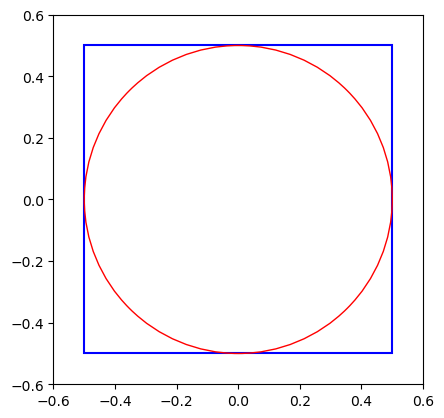

In [6]:
draw_unit_square_with_inscribed_circle(plt.gca())

$V_n=C_nR^n$

$C_n=\frac{\pi^{n/2}}{\Gamma(\frac{n}{2}+1)}$

In [ ]:
max_dim = 20
radius = .5
n_arange = np.arange(1, max_dim + 1)

In [8]:
volume_n = (
                   np.pi ** (n_arange / 2) / 
                   gamma(n_arange / 2 + 1)
           ) * radius ** n_arange
volume_n

array([1.00000000e+00, 7.85398163e-01, 5.23598776e-01, 3.08425138e-01,
       1.64493407e-01, 8.07455122e-02, 3.69122341e-02, 1.58543442e-02,
       6.44240020e-03, 2.49039457e-03, 9.19972597e-04, 3.25991887e-04,
       1.11160737e-04, 3.65762042e-05, 1.16407251e-05, 3.59086045e-06,
       1.07560049e-06, 3.13361689e-07, 8.89236470e-08, 2.46113695e-08])

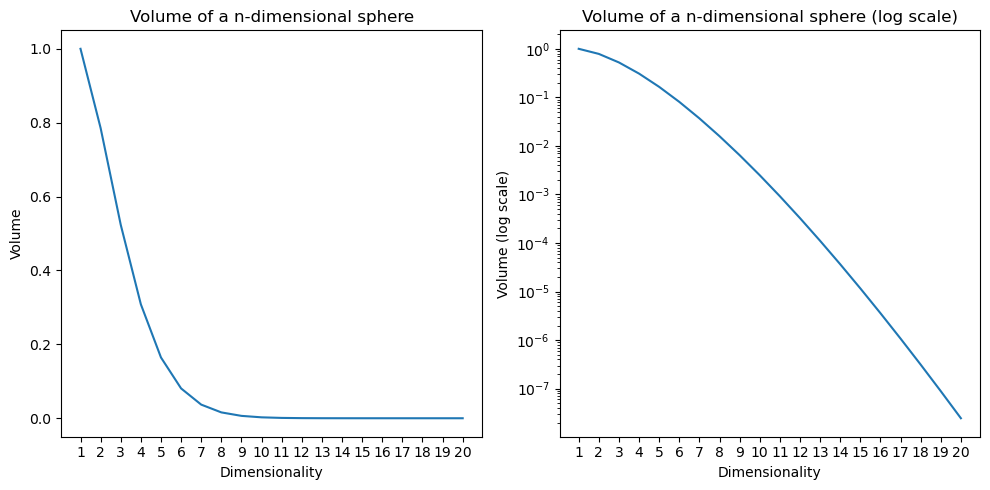

In [17]:
fig, (linear_ax, log_ax) = plt.subplots(1, 2, figsize=(10, 5))

linear_ax.plot(n_arange, volume_n)
linear_ax.set_xlabel('Dimensionality')
linear_ax.set_ylabel('Volume')
linear_ax.set_xticks(n_arange)
linear_ax.set_title('Volume of a n-dimensional sphere')

log_ax.plot(n_arange, volume_n)
log_ax.set_xlabel('Dimensionality')
log_ax.set_ylabel('Volume (log scale)')
log_ax.set_xticks(n_arange)
log_ax.set_yscale('log')
log_ax.set_title('Volume of a n-dimensional sphere (log scale)')

plt.tight_layout()
plt.show()

In [18]:
n_points = 10**3
max_dim = 10**3

avg_distance = np.zeros(max_dim)
avg_distance_to_nn = np.zeros(max_dim)

In [ ]:
for dim in tqdm(range(1, max_dim + 1)):
    points = np.random.rand(n_points, dim)
    distances = np.linalg.norm(points[:, np.newaxis, :] - points[np.newaxis, :, :], axis=-1)
    del points
    np.fill_diagonal(distances, 0)
    avg_distance[dim - 1] = np.mean(distances)
    avg_distance_to_nn[dim - 1] = np.mean(np.min(distances, axis=1))
    del distances


  0%|          | 0/1000 [00:00<?, ?it/s]

 20%|█▉        | 197/1000 [01:56<07:53,  1.70it/s]


KeyboardInterrupt: 